In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages
library(car)       #untuk vif

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




[1] "regdata"

In [2]:
# load data
reg_data <- read.csv("/kaggle/input/regdata/data_preprop_dummies.csv")

In [3]:
# mengintip isi data
summary(reg_data)
head(reg_data)

  engine_power     age_in_days         km         previous_owners
 Min.   : 69.00   Min.   :  91   Min.   :  4981   Min.   :1.000  
 1st Qu.: 69.00   1st Qu.:3136   1st Qu.: 77303   1st Qu.:1.000  
 Median : 69.00   Median :3927   Median :112000   Median :1.000  
 Mean   : 73.03   Mean   :3319   Mean   :102316   Mean   :1.512  
 3rd Qu.: 69.00   3rd Qu.:4322   3rd Qu.:135000   3rd Qu.:2.000  
 Max.   :101.00   Max.   :4719   Max.   :259000   Max.   :4.000  
     price        model_lounge      model_pop       model_sport    
 Min.   : 2890   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 4600   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median : 5000   Median :1.0000   Median :0.0000   Median :0.0000  
 Mean   : 5855   Mean   :0.5594   Mean   :0.2665   Mean   :0.1715  
 3rd Qu.: 5500   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :12900   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
 transmission_manual
 Min.   :0.000      
 1st Qu.:1.000      

,engine_power,age_in_days,km,previous_owners,price,model_lounge,model_pop,model_sport,transmission_manual
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,69,4474,56779,2,4490,0,1,0,1
2,69,2708,160000,1,4500,1,0,0,1
3,69,3470,170000,2,4500,1,0,0,0
4,69,3288,132000,2,4700,0,0,1,1
5,69,3712,124490,2,4790,0,0,1,1
6,69,3684,91000,1,4900,1,0,0,1


,engine_power,age_in_days,km,previous_owners,price,model_lounge,model_pop,model_sport,transmission_manual
engine_power,1.000000000,0.240853589,0.20116751,0.014113003,-0.205477816,-0.089758218,-0.13311525,0.27717108,0.009221188
age_in_days,0.240853589,1.000000000,0.75274126,0.001349008,-0.912773267,-0.212085412,0.10424687,0.17197716,0.025354108
km,0.201167511,0.752741263,1.00000000,0.077022105,-0.789243558,-0.131994176,0.04951047,0.12981717,-0.015629650
previous_owners,0.014113003,0.001349008,0.07702211,1.000000000,-0.006826529,0.004585495,-0.01812025,0.02161629,0.034130039
price,-0.205477816,-0.912773267,-0.78924356,-0.006826529,1.000000000,0.171267755,-0.09662679,-0.12928133,-0.036480997
model_lounge,-0.089758218,-0.212085412,-0.13199418,0.004585495,0.171267755,1.000000000,-0.67912229,-0.51262709,-0.107395063
model_pop,-0.133115253,0.104246874,0.04951047,-0.018120246,-0.096626791,-0.679122288,1.00000000,-0.27423959,0.064008323
model_sport,0.277171082,0.171977162,0.12981717,0.021616288,-0.129281330,-0.512627086,-0.27423959,1.00000000,0.064509839
transmission_manual,0.009221188,0.025354108,-0.01562965,0.034130039,-0.036480997,-0.107395063,0.06400832,0.06450984,1.000000000


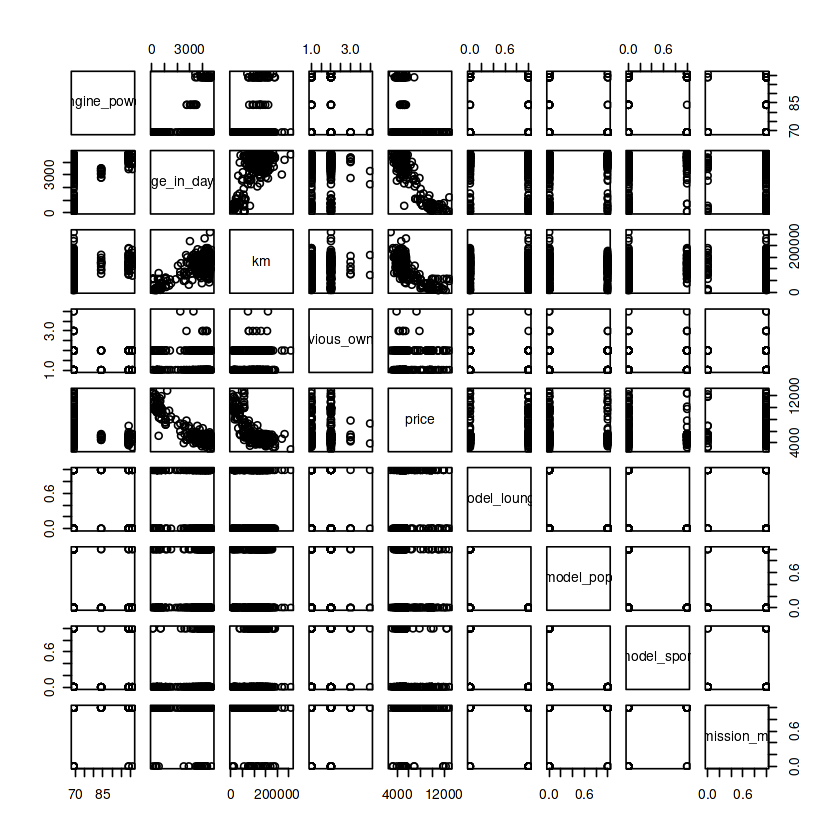

In [4]:
# melihat korelasi
cor(reg_data)
plot(reg_data)

Dari nilai dan visualisasi korelasi antar variabel prediktor di atas, mutlak dari korelasi yang bernilai > 0.5 adalah “model_sport” dengan “model_lounge”, “model_pop” dengan “model_lounge”, dan “km” dengan “age_in_days”. Dengan demikian, kami menduga jika penggunaan semua variabel prediktor tanpa adanya transformasi akan terjadi multikolinearitas. 
Jika melihat korelasi antara variabel respon dan masing-masing variabel prediktor, terlihat variabel prediktor yang paling berkorelasi dengan variabel respon adalah "age_in_days" dan "price", sedangkan variabel-variabel lainnya memiliki korelasi yang kecil dengan variabel respon. Kami menduga dua variabel tersebut akan digunakan tanpa perlu adanya transformasi pada model nantinya.


**Model 1**

In [5]:
model1 <- lm(price ~ engine_power + age_in_days + km + previous_owners + model_lounge + model_pop + model_sport + transmission_manual,
            data = reg_data)
summary(model1)


Call:
lm(formula = price ~ engine_power + age_in_days + km + previous_owners + 
    model_lounge + model_pop + model_sport + transmission_manual, 
    data = reg_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4034.2  -403.4   -38.7   391.3  4237.7 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.133e+04  8.741e+02  12.962  < 2e-16 ***
engine_power         2.910e+00  4.401e+00   0.661    0.509    
age_in_days         -1.090e+00  4.508e-02 -24.178  < 2e-16 ***
km                  -1.073e-02  1.340e-03  -8.006 1.55e-14 ***
previous_owners      5.179e+01  7.410e+01   0.699    0.485    
model_lounge        -8.907e+02  8.078e+02  -1.103    0.271    
model_pop           -8.710e+02  8.114e+02  -1.074    0.284    
model_sport         -7.350e+02  8.149e+02  -0.902    0.368    
transmission_manual -2.078e+02  1.669e+02  -1.245    0.214    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error:

In [6]:
vif(model1)

engine_power         age_in_days                  km     previous_owners 
           1.142150            2.451890            2.353439            1.017729 
       model_lounge           model_pop         model_sport transmission_manual 
          95.172719           76.151641           55.843636            1.015970

Dapat dilihat bahwa model_lounge, model_pop, dan  model_sport memiliki nilai VIF > 10, sehingga kami simpulkan terdapat multikolinearitas pada model ini. Korelasi ini tidak baik karena dapat membuat model menjadi tidak efektif. Dengan demikian, model ini tidak akan digunakan lebih lanjut.

**Model 2**

In [7]:
stepwise<-lm(price~., reg_data)
step(stepwise)

Start:  AIC=5076.08
price ~ engine_power + age_in_days + km + previous_owners + model_lounge + 
    model_pop + model_sport + transmission_manual

                      Df Sum of Sq       RSS    AIC
- engine_power         1    280038 237240869 5074.5
- previous_owners      1    312795 237273626 5074.6
- model_sport          1    520942 237481773 5074.9
- model_pop            1    738096 237698926 5075.3
- model_lounge         1    778708 237739539 5075.3
- transmission_manual  1    992491 237953322 5075.7
<none>                             236960831 5076.1
- km                   1  41051634 278012465 5134.6
- age_in_days          1 374397449 611358280 5433.3

Step:  AIC=5074.53
price ~ age_in_days + km + previous_owners + model_lounge + model_pop + 
    model_sport + transmission_manual

                      Df Sum of Sq       RSS    AIC
- previous_owners      1    315894 237556763 5073.0
- model_sport          1    502740 237743608 5073.3
- model_pop            1    754699 237995568 


Call:
lm(formula = price ~ age_in_days + km, data = reg_data)

Coefficients:
(Intercept)  age_in_days           km  
  1.054e+04   -1.086e+00   -1.056e-02  


In [8]:
model2 <- lm(price ~  age_in_days + km,
            data = reg_data)
summary(model2)


Call:
lm(formula = price ~ age_in_days + km, data = reg_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3878.3  -414.3   -65.7   401.8  4188.8 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.054e+04  1.073e+02  98.241   <2e-16 ***
age_in_days -1.086e+00  4.371e-02 -24.843   <2e-16 ***
km          -1.056e-02  1.326e-03  -7.964    2e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 799.9 on 376 degrees of freedom
Multiple R-squared:  0.8572,	Adjusted R-squared:  0.8565 
F-statistic:  1129 on 2 and 376 DF,  p-value: < 2.2e-16


**Model 3**

Untuk membuat model yang dapat berjalan dengan baik, maka kami akan melakukan plot setiap data yang menjadi pengaruh nilai y dengan membuat model linier standarnya. Apabila data nantinya kurang fitted terhadap model, maka akan dilakukan beberapa cara, seperti transformasi, untuk memperbaharui model.

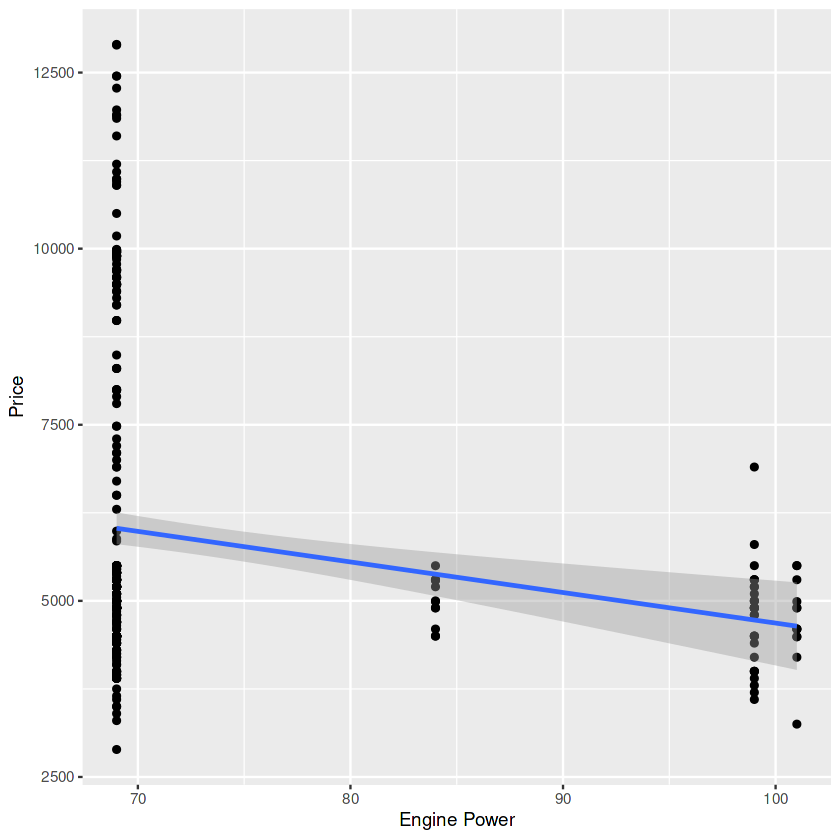

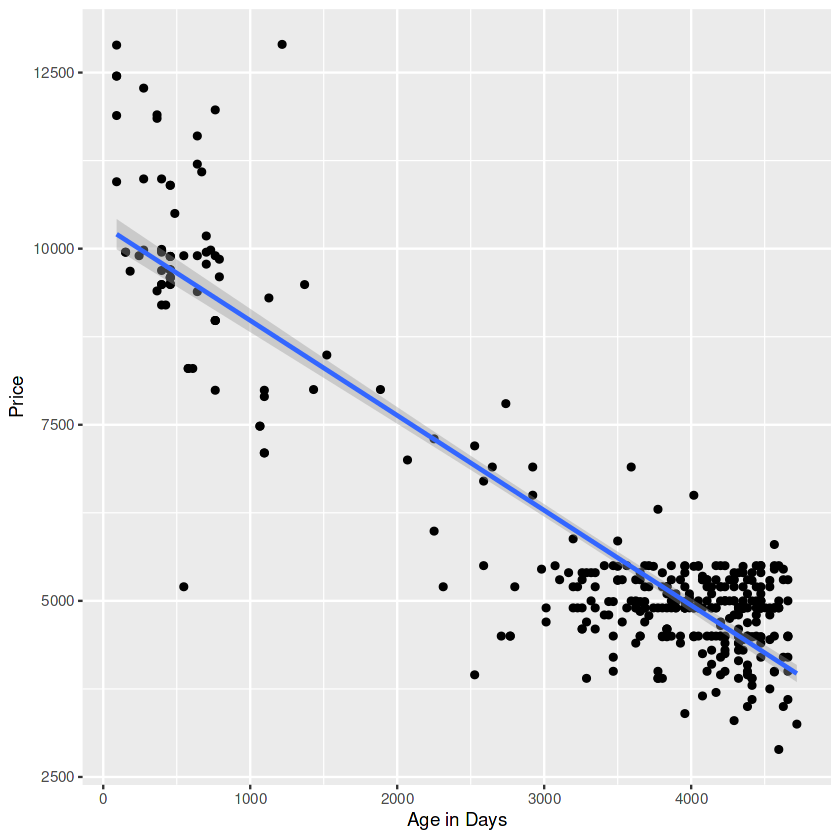

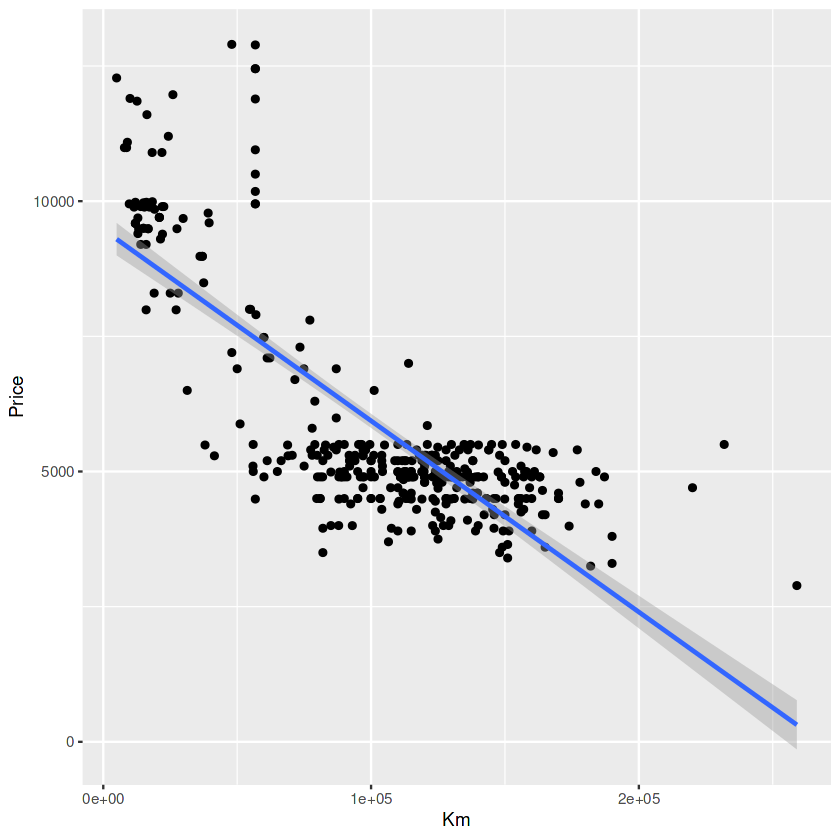

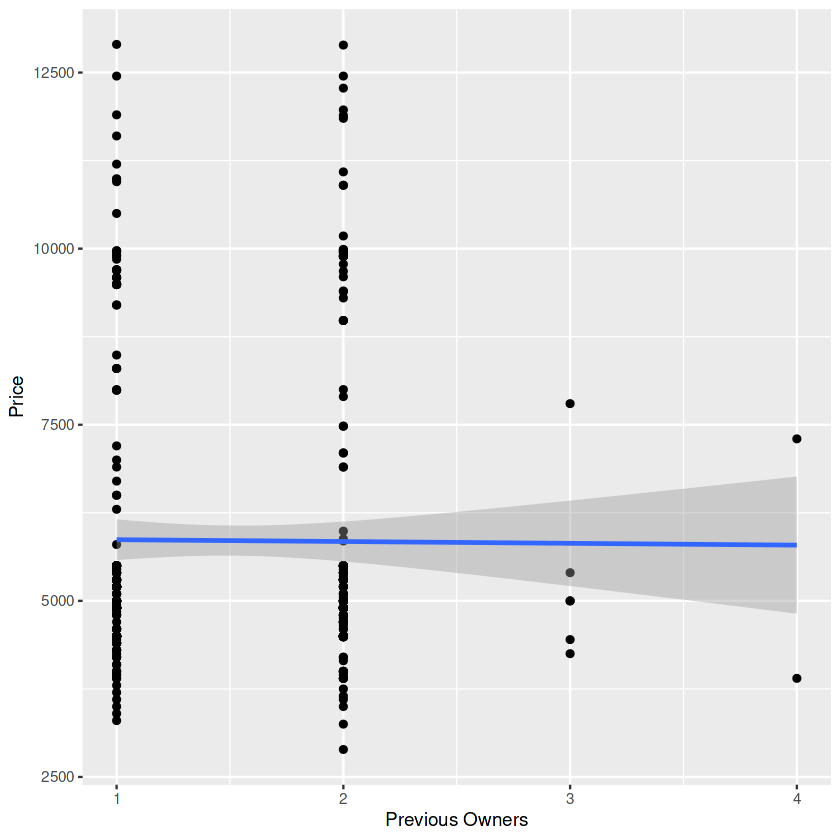

In [9]:
plot_engine <- ggplot(reg_data, aes(x=engine_power, y = price)) +
  geom_point() + stat_smooth(method = lm, formula = y~x) +
  xlab("Engine Power") + ylab("Price")
plot_engine

plot_age <- ggplot(reg_data, aes(x=age_in_days, y = price)) +
  geom_point() + stat_smooth(method = lm, formula = y~x) +
  xlab("Age in Days") + ylab("Price")
plot_age

plot_km <- ggplot(reg_data, aes(x=km, y = price)) +
  geom_point() + stat_smooth(method = lm, formula = y~x) +
  xlab("Km") + ylab("Price")
plot_km

plot_owners <- ggplot(reg_data, aes(x=previous_owners, y = price)) +
  geom_point() + stat_smooth(method = lm, formula = y~x) +
  xlab("Previous Owners") + ylab("Price")
plot_owners

(1) Dari plot untuk engine_power, dapat dikatakan sudah cukup fitted terhadap data, maka pemodelan ini yang akan digunakan pada model nantinya.

(2) Dari plot age_in_days,  dapat dikatakan sudah cukup fitted terhadap data, maka pemodelan ini yang akan digunakan pada model nantinya.

(3) Dari plot km terlihat bahwa model masih kurang fitted pada data. Data tersebar menyerupai bentuk logaritma.

(4) Dari plot previous_owners dapat dikatakan sudah cukup fitted terhadap data, maka pemodelan ini yang akan digunakan pada model nantinya.


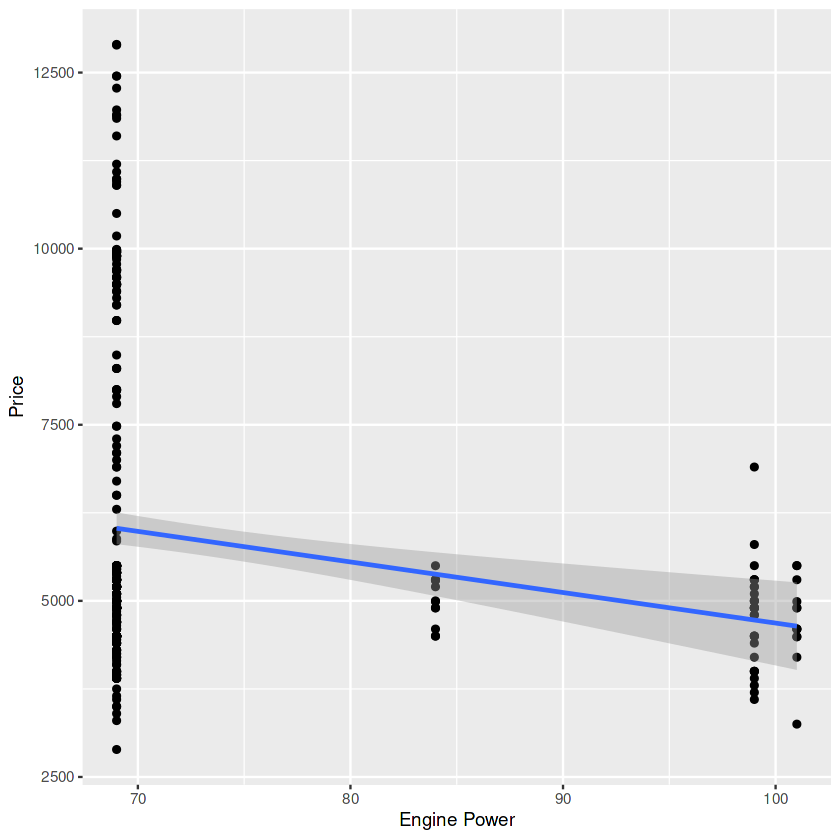

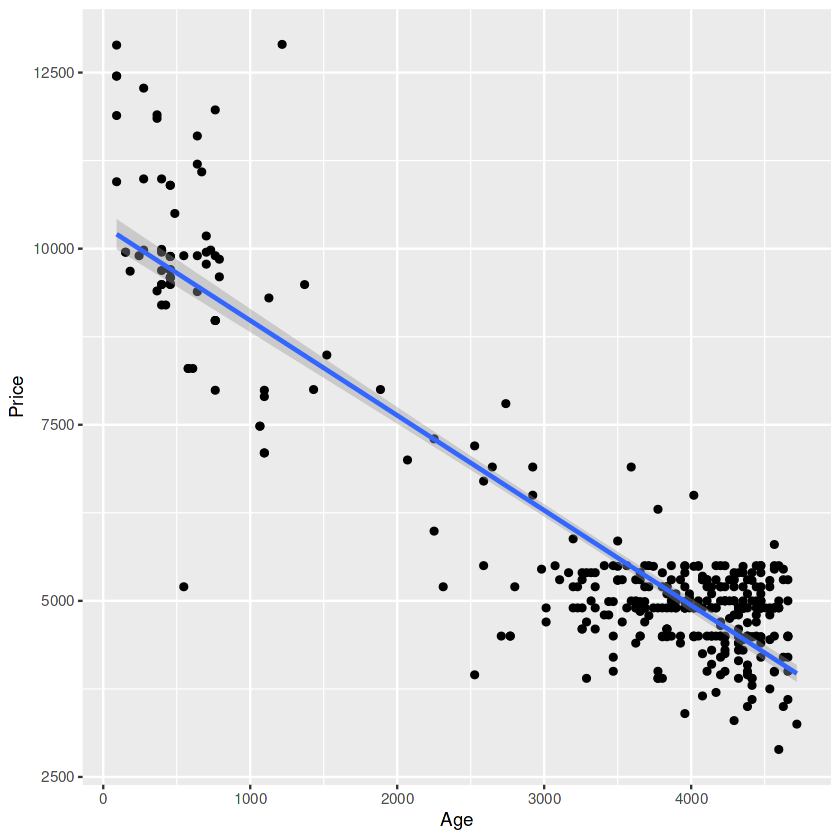

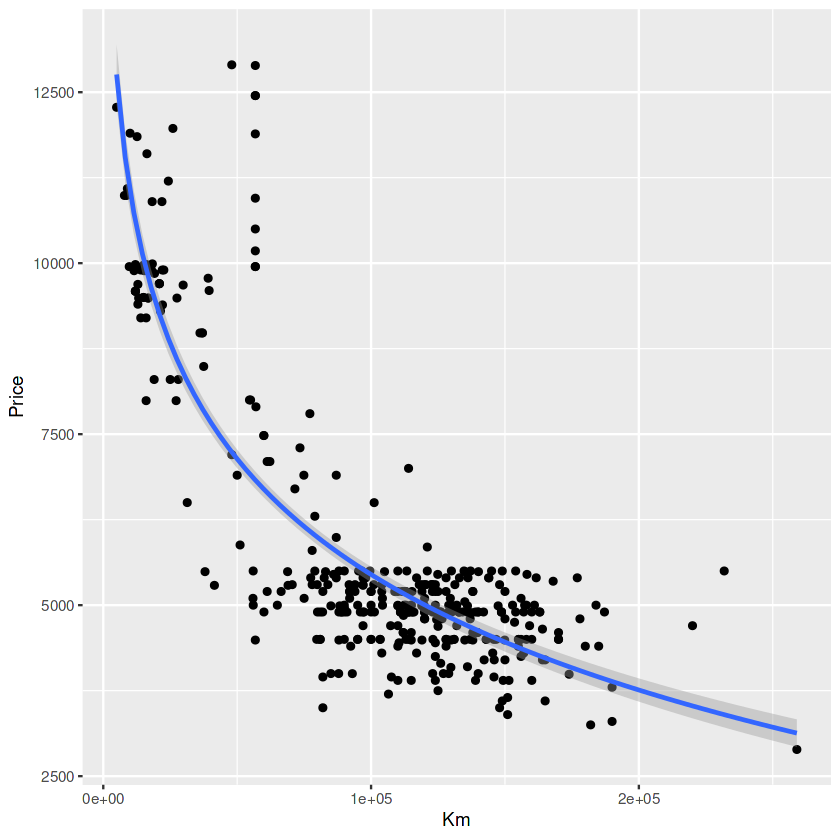

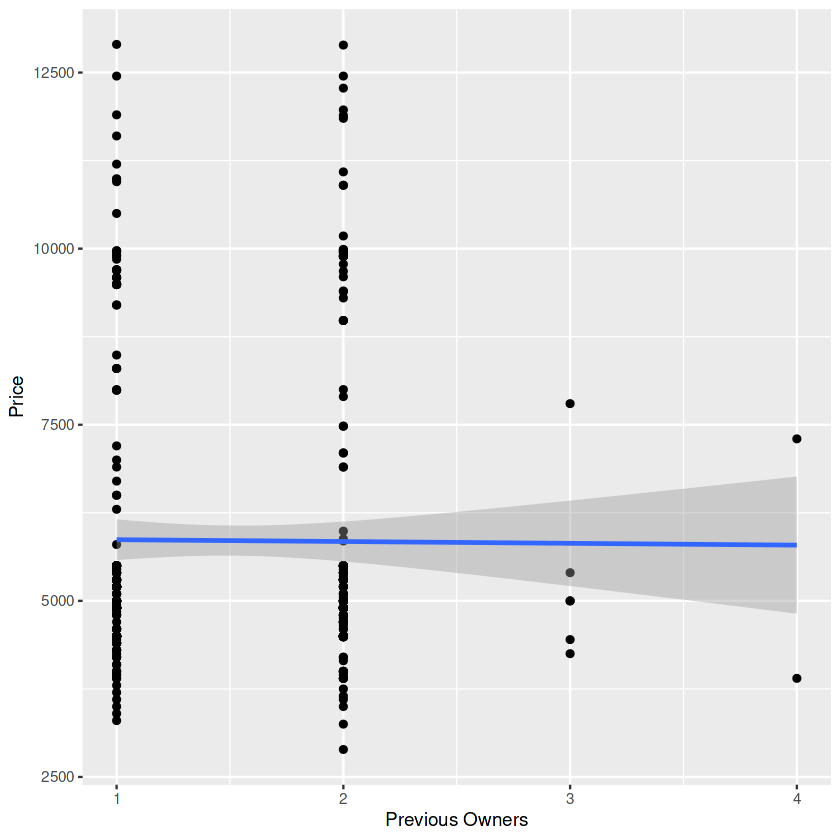

In [10]:
plot_engine <- ggplot(reg_data, aes(x=engine_power, y = price)) +
  geom_point() + stat_smooth(method = lm, formula = y~x) +
  xlab("Engine Power") + ylab("Price")
plot_engine

plot_age <- ggplot(reg_data, aes(x=age_in_days, y = price)) +
  geom_point() + stat_smooth(method = lm, formula = y~x) +
  xlab("Age") + ylab("Price")
plot_age

plot_km <- ggplot(reg_data, aes(x=km, y = price)) +
  geom_point() + stat_smooth(method = lm, formula = y~log(x)) +
  xlab("Km") + ylab("Price")
plot_km

plot_owners <- ggplot(reg_data, aes(x=previous_owners, y = price)) +
  geom_point() + stat_smooth(method = lm, formula = y~x) +
  xlab("Previous Owners") + ylab("Price")
plot_owners

Dapat dilihat sekarang pada plot (3) regresi dengan logaritma ini terlihat data telah cukup fitted terhadap model. Maka untuk pemodelan akan dilakukan dengan model yang menyesuaikan sebaran data pada keempat plot ini.

Akan dilakukan transformasi variabel-variabel prediktor sesuai dengan sebaran data tersebut.

Maka, modelnya akan menjadi


In [11]:
reg_data$km <- log(reg_data$km)

In [12]:
model3 <- lm(price ~ engine_power + age_in_days + km + previous_owners + model_lounge + model_pop + model_sport + transmission_manual,
            data = reg_data)
summary(model3)


Call:
lm(formula = price ~ engine_power + age_in_days + km + previous_owners + 
    model_lounge + model_pop + model_sport + transmission_manual, 
    data = reg_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3459.3  -446.7   -56.0   375.9  4574.2 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.936e+04  1.228e+03  15.765   <2e-16 ***
engine_power         1.572e+00  4.311e+00   0.365    0.716    
age_in_days         -9.694e-01  5.204e-02 -18.628   <2e-16 ***
km                  -9.041e+02  9.973e+01  -9.066   <2e-16 ***
previous_owners      7.212e+01  7.278e+01   0.991    0.322    
model_lounge        -1.289e+02  7.978e+02  -0.162    0.872    
model_pop           -1.201e+02  8.009e+02  -0.150    0.881    
model_sport          5.655e+01  8.051e+02   0.070    0.944    
transmission_manual -1.695e+02  1.634e+02  -1.038    0.300    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error:

In [13]:
vif(model3)

engine_power         age_in_days                  km     previous_owners 
           1.141444            3.404087            3.349776            1.022699 
       model_lounge           model_pop         model_sport transmission_manual 
          96.716134           77.282744           56.768266            1.013612

Dapat dilihat bahwa model_lounge, model_pop, dan  model_sport juga memiliki nilai VIF>10, sehingga kami simpulkan terdapat multikolinearitas atau terdapat korelasi antar variabel prediktor pada model ini. Korelasi ini tidak baik karena dapat membuat model menjadi tidak efektif. Dengan demikian, model ini tidak akan digunakan lebih lanjut. Dengan demikian, model ini tidak akan digunakan lebih lanjut.


**Model 4**

In [14]:
stepwise<-lm(price~., reg_data)
step(stepwise)

Start:  AIC=5060.61
price ~ engine_power + age_in_days + km + previous_owners + model_lounge + 
    model_pop + model_sport + transmission_manual

                      Df Sum of Sq       RSS    AIC
- model_sport          1      3033 227486047 5058.6
- model_pop            1     13819 227496833 5058.6
- model_lounge         1     16060 227499075 5058.6
- engine_power         1     81723 227564737 5058.8
- previous_owners      1    603723 228086737 5059.6
- transmission_manual  1    661984 228144998 5059.7
<none>                             227483014 5060.6
- km                   1  50529451 278012465 5134.6
- age_in_days          1 213344402 440827416 5309.4

Step:  AIC=5058.62
price ~ engine_power + age_in_days + km + previous_owners + model_lounge + 
    model_pop + transmission_manual

                      Df Sum of Sq       RSS    AIC
- engine_power         1     82606 227568654 5056.8
- previous_owners      1    606966 228093013 5057.6
- transmission_manual  1    662484 228148531


Call:
lm(formula = price ~ age_in_days + km + model_lounge + model_pop, 
    data = reg_data)

Coefficients:
 (Intercept)   age_in_days            km  model_lounge     model_pop  
  19314.7404       -0.9737     -887.9285     -184.4377     -188.1653  


In [15]:
model4 <- lm(formula = price ~ age_in_days + km + model_lounge + model_pop, data = reg_data)
summary(model4)


Call:
lm(formula = price ~ age_in_days + km + model_lounge + model_pop, 
    data = reg_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3346.5  -434.4   -51.6   374.0  4529.1 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.931e+04  9.798e+02  19.713   <2e-16 ***
age_in_days  -9.737e-01  5.107e-02 -19.065   <2e-16 ***
km           -8.879e+02  9.765e+01  -9.093   <2e-16 ***
model_lounge -1.844e+02  1.124e+02  -1.641    0.102    
model_pop    -1.882e+02  1.241e+02  -1.517    0.130    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 782.2 on 374 degrees of freedom
Multiple R-squared:  0.8642,	Adjusted R-squared:  0.8628 
F-statistic: 595.1 on 4 and 374 DF,  p-value: < 2.2e-16


Model ini kurang baik dikarenakan Pr(>|t|) dari beberapa variabel cukup besar lebih dari 0.05 yang menyatakan bahwa variabel-variabel tersebut kurang signifikan. Jika dibandingkan dengan model 2, dari hasil summary pada kedua model, diperoleh bahwa model 2 memiliki R2=0.8572 dan Ra2=0.8565, sedangkan model 4 memiliki R2=0.8642 dan Ra2=0.8628. Nilai dari kedua model tersebut hanya berbeda 0.01, padahal pada model 2 hanya menggunakan dua variabel prediktor tanpa adanya transformasi, dan model 4 menggunakan 4 variabel prediktor dengan salah satu variabelnya telah dilakukan transformasi log. Pada model regresi, kita ingin menggunakan sesedikit mungkin variabel, tetapi yang mungkin menjelaskan realitas kebenaran sebanyak mungkin. Dengan demikian, model ini tidak akan digunakan lebih lanjut.

**Model Terbaik**

In [16]:
summary(model2)


Call:
lm(formula = price ~ age_in_days + km, data = reg_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3878.3  -414.3   -65.7   401.8  4188.8 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.054e+04  1.073e+02  98.241   <2e-16 ***
age_in_days -1.086e+00  4.371e-02 -24.843   <2e-16 ***
km          -1.056e-02  1.326e-03  -7.964    2e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 799.9 on 376 degrees of freedom
Multiple R-squared:  0.8572,	Adjusted R-squared:  0.8565 
F-statistic:  1129 on 2 and 376 DF,  p-value: < 2.2e-16


Dalam model ini, didapat bahwa semua variabel prediktor yang digunakan signifikanm dapat dilihat dari nilai Pr(>|t|) semuanya dibawah 0.05, dengan nilai R-squared yang baik, yaitu 0.8572 dan nilai adjusted R-squared yang baik, yaitu 0.8565. Selain itu, dapat dilihat p-value dari model linier ini <0.05 (alpha) yang menandakan bahwa model ini dapat berguna. 

**Analisis Residual**

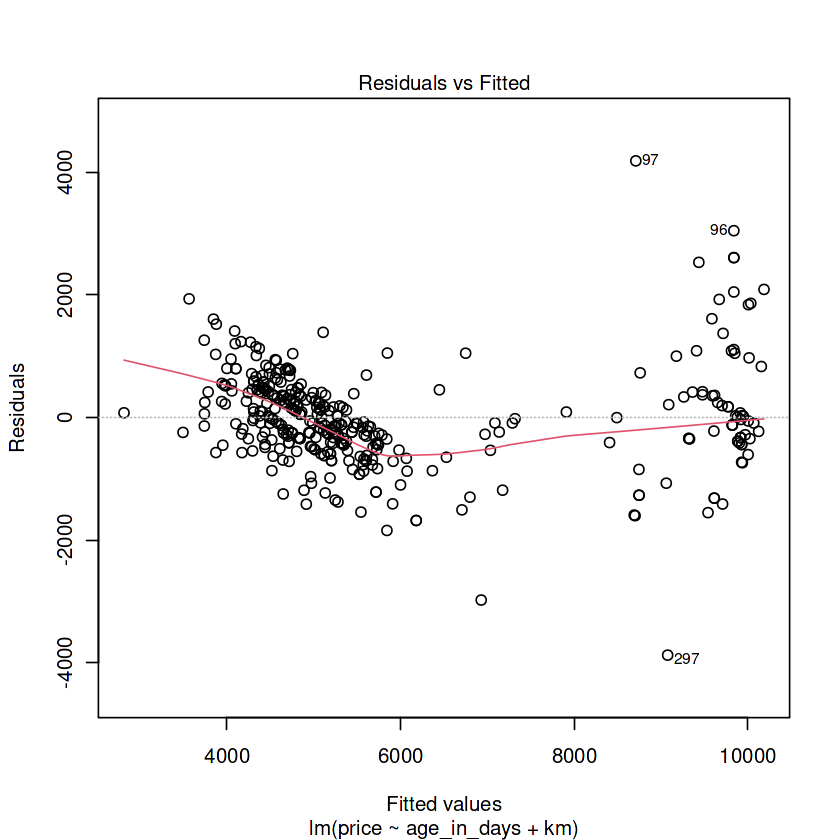

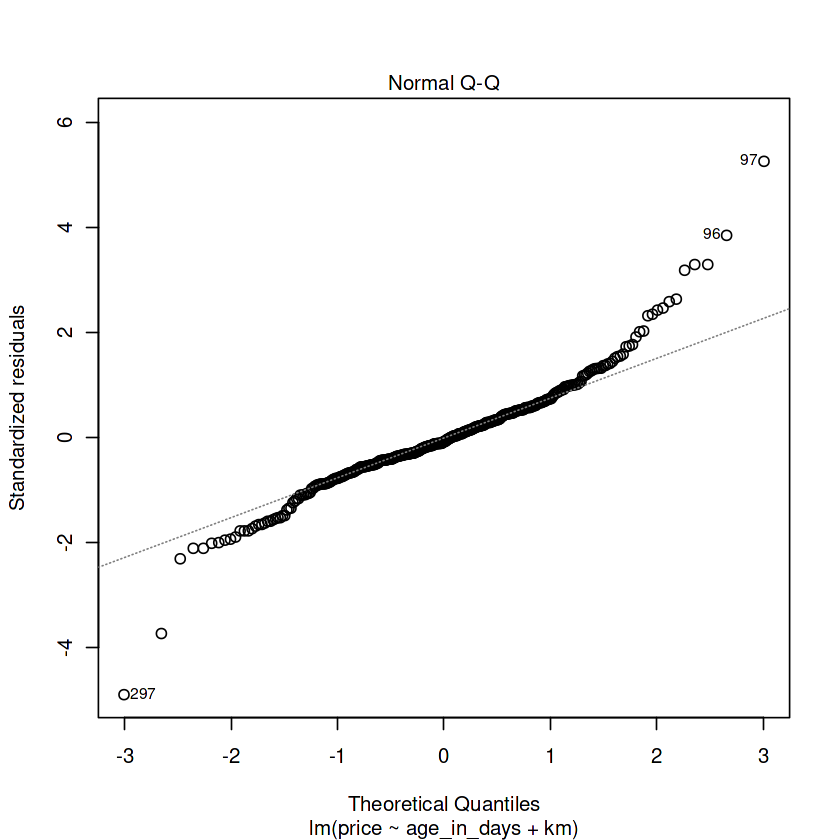

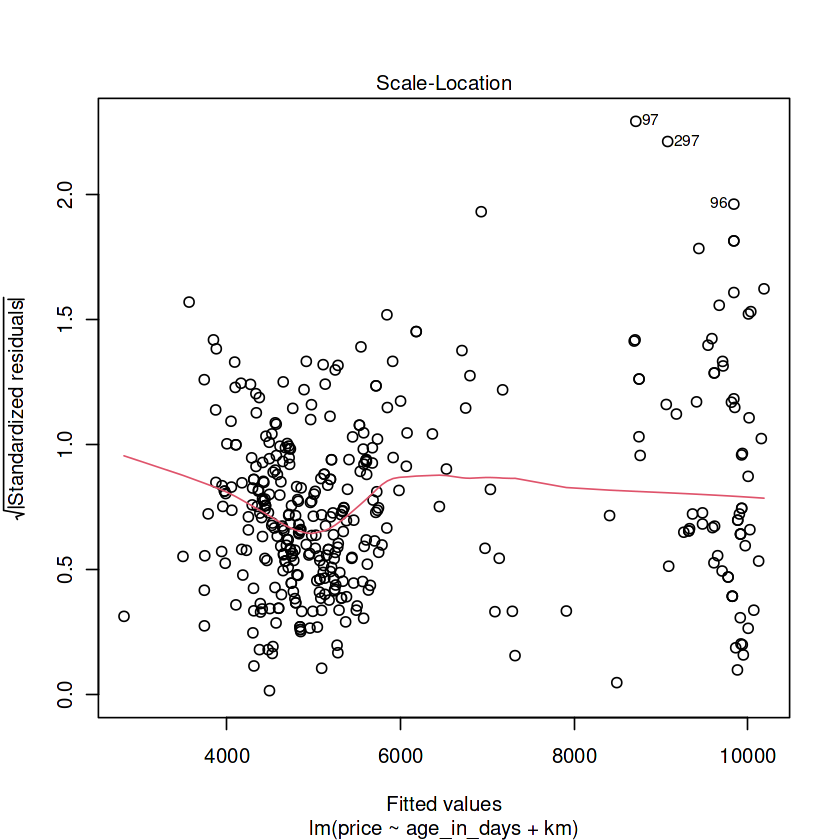

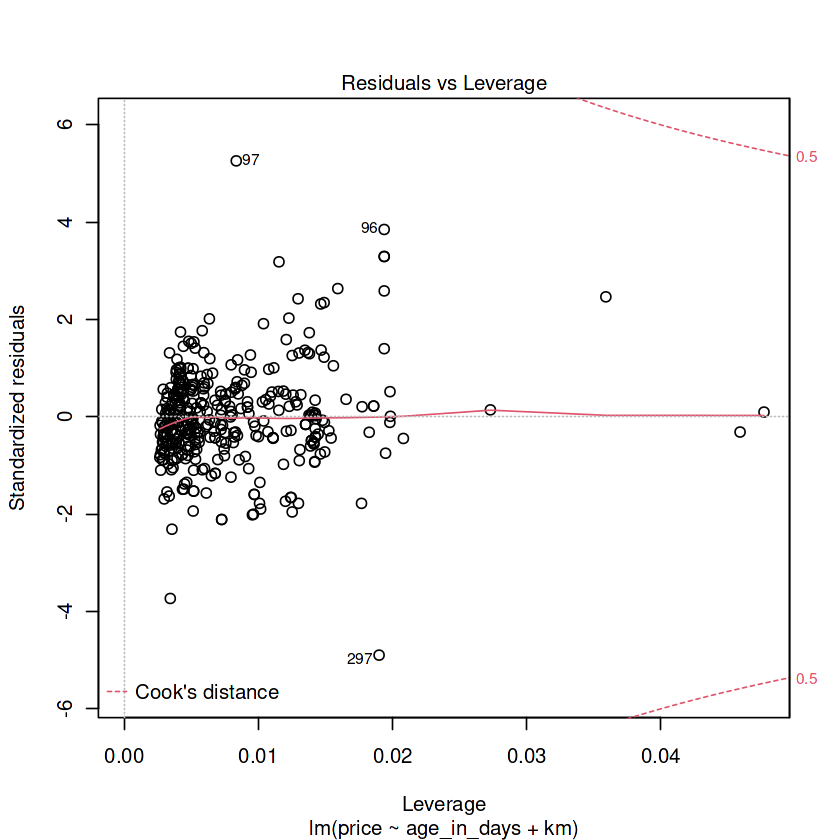

In [17]:
par(mfrow=c(1,1))
plot(model2)

Pada bagian ini, akan dilihat apakah asumsi normalitas pada residual, linearitas, dan heteroskedastisitas terpenuhi pada model atau tidak.

Untuk menguji asumsi pada model, kami melakukan visualisasi dalam bentuk plot untuk melihat apakah asumsi terpenuhi atau tidak. Dari plot Residuals vs Fitted, kita dapat melihat bahwa data ini cukup mempunyai hubungan linear. Dari plot Normal Q-Q, dapat dilihat bahwa data berada disekitar garis lurus, maka residualnya terdistribusi secara normal, sehingga dapat dikatakan model regresi memenuhi asumsi Normalitas. Dari plot Residuals vs Leverage, dapat dilihat bahwa semua data yang digunakan merupakan data yang penting karena berada di sekitar Cook’s Distance. Dari plot Scale Location, dapat dilihat bahwa variasinya tersebar luas (heteroskedastisitas). 

**Multikolinearitas**

In [18]:
vif(model2)

age_in_days          km 
   2.307441    2.307441

Dapat dilihat bahwa nilai VIF ada variabel age_in_days = 2.30744066903809 < 10 dan nilai VIF ada variabel km = 2.30744066903809< 10. Dengan demikian, dapat dikatakan bahwa tidak terdapat multikolinearitas pada model ini.

**Interval Kepercayaan**

In [19]:
confint(model2)

,2.5 %,97.5 %
(Intercept),1.032848e+04,1.075038e+04
age_in_days,-1.171726e+00,-9.998485e-01
km,-1.317063e-02,-7.954888e-03


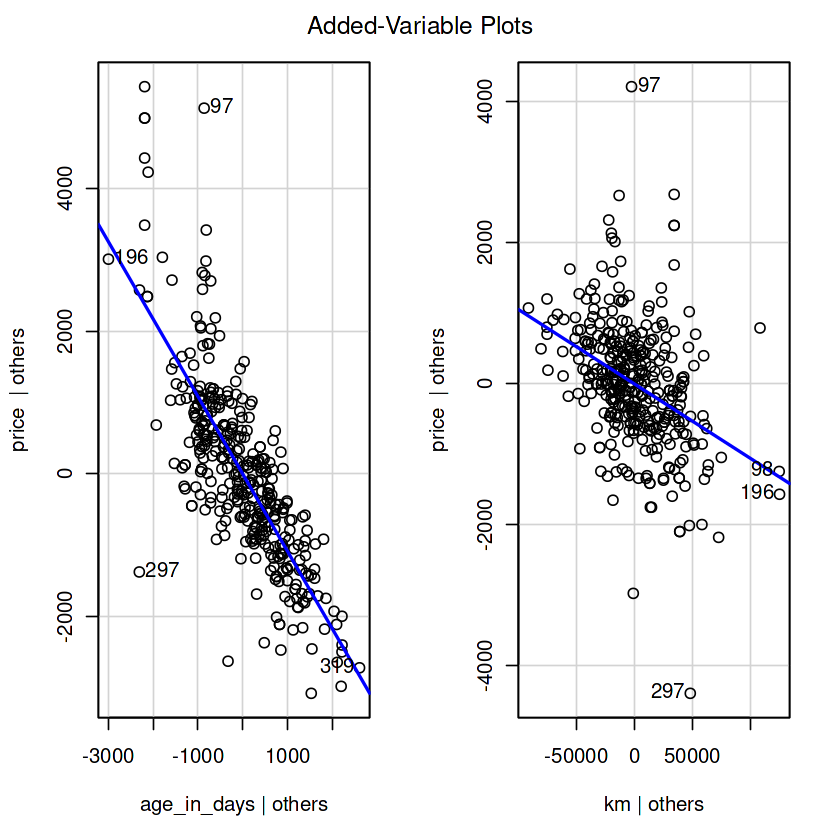

In [20]:
avPlots(model2)